<a href="https://colab.research.google.com/github/Vitalyastiy/cheat-python/blob/main/viz/%D0%9F%D0%B0%D0%BD%D0%B4%D0%B0%D1%81-%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pythonist.ru/kak-sozdavat-naglyadnye-grafiki-v-python-bystro-krasivo-i-ochen-krasivo/amp/

In [6]:
# загружаем данные
import pandas as pd
import plotly
import numpy as np
import seaborn as sns
import plotly.express


In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/FBosler/AdvancedPlotting/master/combined_set.csv')
# присваиваем метки каждому году
data['Mean Log GDP per capita']  = data.groupby('Year')['Log GDP per capita'].transform(
    pd.qcut,
    q=5,
    labels=(['Lowest','Low','Medium','High','Highest'])
)

<Axes: ylabel='Frequency'>

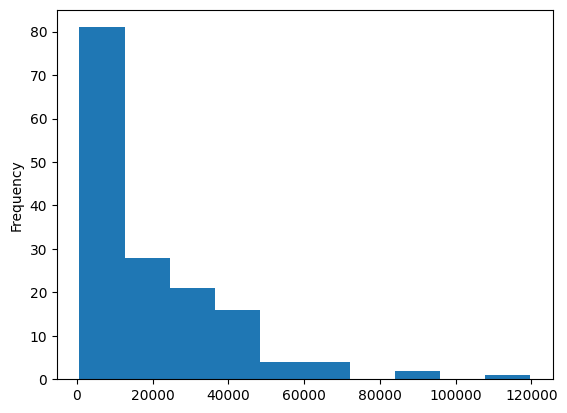

In [8]:
np.exp(data[data['Year']==2018]['Log GDP per capita']).plot( #значение 'Log GDP per capita' представляет логарифм натуральный от GDP per capita. Вычисление экспоненты от значения 'Log GDP per capita' приводит к восстановлению исходного значения GDP per capita, которое уже не будет находиться на логарифмической шкале. Таким образом, построение гистограммы распределения экспоненты значения 'Log GDP per capita' позволяет оценить распределение исходных значений GDP per capita.
    kind='hist'
)

kind: Pandas должна знать, какого типа график вы хотите строить.
 Возможны следующие варианты: hist, bar, barh, scatter, area, kde, line, box, hexbin, pie.

figsize: Позволяет переопределить значение размера, заданное по умолчанию (6 дюймов в ширину и 4 дюйма в высоту). Данный параметр принимает на вход кортеж, например figsize=(12,8), что я часто использую.

title: Добавляет к графику заголовок. Как правило, я его использую, чтобы кратко описать, что происходит на графике, дабы потом это можно было быстро понять. Данный параметр принимает на вход строку.

bins: Позволяет переопределить ширину областей гистограммы. Данный параметр принимает на вход список или подобную ему последовательность, например bins=np.arange(2,8,0.25).

xlim/ylim: Позволяет переопределить максимальные и минимальные значения осей x и y. Оба параметра принимают на вход кортежи, например xlim=(0,5).